<a href="https://colab.research.google.com/github/nathencinoza/machine-learning/blob/main/HeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Orga 2/TP3/TP3 dataset music/train.parquet')

In [ ]:
df = df[['track_name', 'genre', 'popularity', 'artist', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']]
df.head(5)

,track_name,genre,popularity,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Halo,Dance,79,Beyoncé,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
1,Halo,Pop,80,Beyoncé,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
2,Halo,R&B,80,Beyoncé,0.2720,0.508,261640,0.720,0.0000,B,0.0563,-5.908,Minor,0.0628,79.983,4/4,0.472
3,Partition,Dance,71,Beyoncé,0.0296,0.412,319467,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174
4,Partition,Pop,71,Beyoncé,0.0296,0.412,319467,0.441,0.0726,B,0.3060,-11.523,Minor,0.2910,185.571,4/4,0.174


In [ ]:
generos = ['Rock','Alternative','Dance',"Children’s Music",'Pop','Folk','Rap','R&B','Blues','Country','Ska','Hip-Hop','Indie','Soul']
df = df[df['genre'].isin(generos)]

Busque como se dividian los tempos y sus nombres

In [ ]:
df['tempo'] = df['tempo'].apply(lambda x: 'Grave' if (x >35 and x < 43) else ('Largo' if (x > 44 and  x <47) else ('Larghetto' if (x > 48 and x < 51) else ('Adagio' if (x > 52 and x < 54) else ('Andante' if (x > 55 and x < 65) else ('Andantino' if (x > 66 and x < 69) else ('Moderato' if (x > 70 and x < 95) else ('Allegretto' if (x >96 and x < 112) else ('Allegro' if (x > 113 and x < 120) else ('Vivace' if (x > 121 and x < 140) else ('Presto' if (x > 141 and x < 175) else 'Prestissimo')))))))))))

In [ ]:
df.columns

Index(['track_name', 'genre', 'popularity', 'artist', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'speechiness', 'tempo',
       'time_signature', 'valence'],
      dtype='object')

In [ ]:
matriz = df.pivot_table(index='genre', columns = 'tempo', values = 'danceability').dropna(axis='columns')

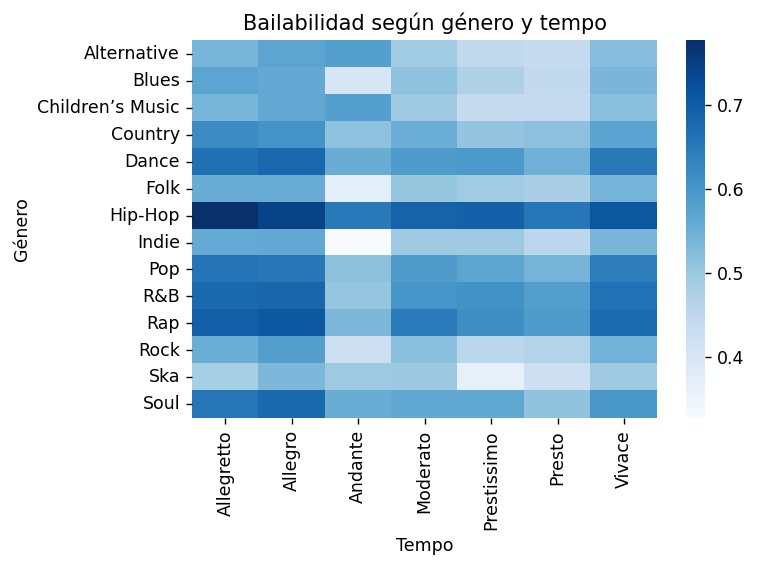

In [ ]:
plt.figure(dpi = 125)
fig = sns.heatmap(matriz, cmap = sns.color_palette("Blues", as_cmap=True))
plt.title("Bailabilidad según género y tempo")
plt.ylabel("Género")
plt.xlabel("Tempo")
plt.show()